## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [155]:
from sklearn.preprocessing import LabelEncoder

In [98]:
plt.style.use('seaborn')

## Loading datasets 

In [71]:
df = pd.read_csv('BankChurners.csv')
print('Shape: {}'.format(df.shape))    # 10127 clients, 23 features
df.head()

Shape: (10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [26]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [72]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 
        'CLIENTNUM'], 
       inplace=True, axis=1)

In [18]:
len(df.iloc[:, 0].unique())    # No duplicate clients

10127

In [74]:
df.info()    # No null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [47]:
cats = ['Attrition_Flag', 'Gender', 'Education_Level', 
        'Marital_Status', 'Income_Category', 'Card_Category']

In [30]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Exploring data analysis

### Categorical features

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


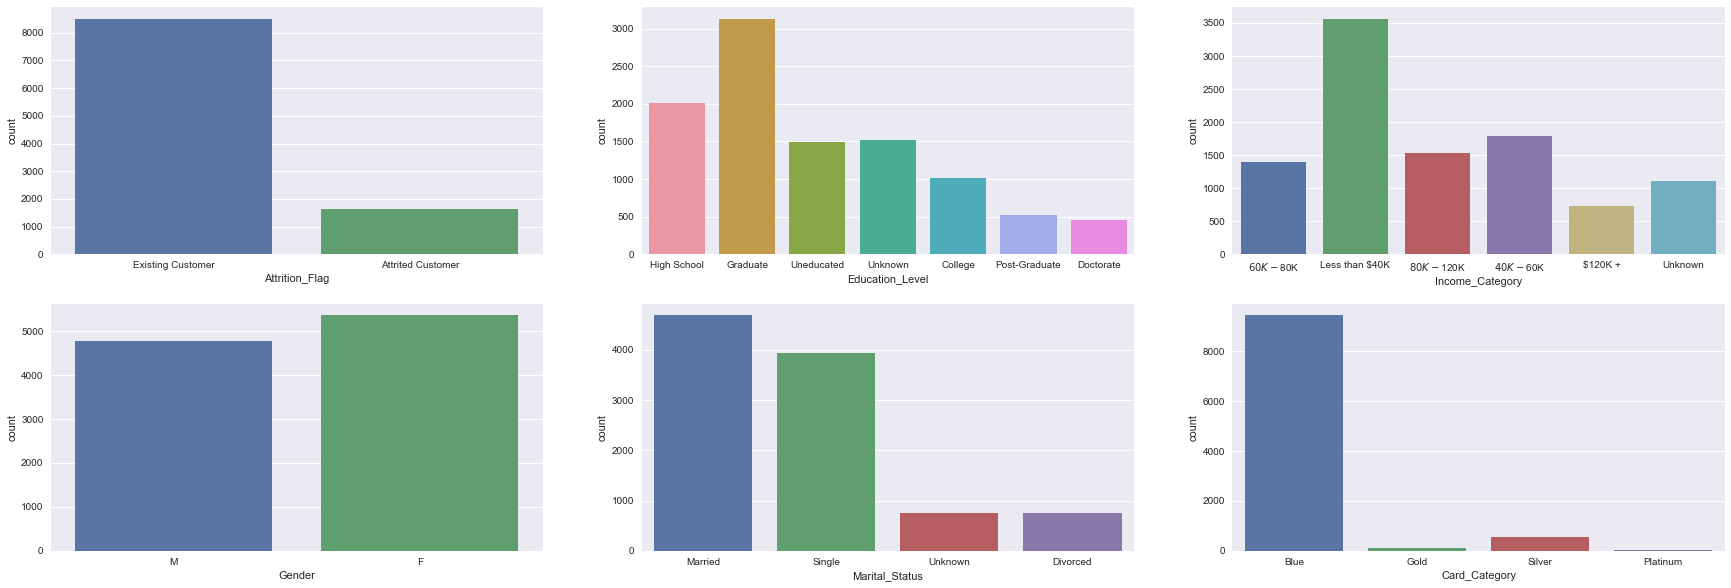

In [99]:
# Countplot
fig, ax=plt.subplots(ncols=3, nrows=2, figsize=(30, 10))

count = 0
for i in range(3):
    for j in range(2):
        sns.countplot(x=cats[count], data=df, ax=ax[j][i])
        print(df[cats[count]].value_counts())
        count += 1

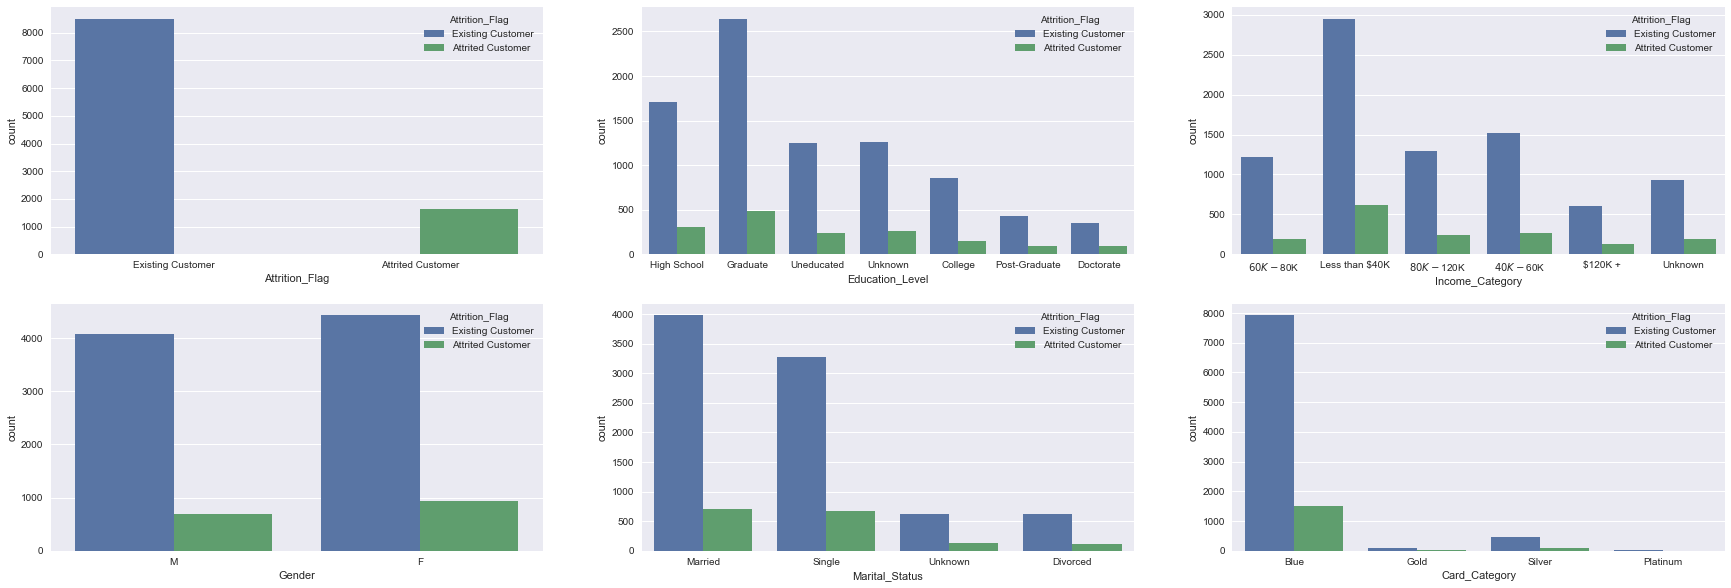

In [100]:
# Countplot
fig, ax=plt.subplots(ncols=3, nrows=2, figsize=(30, 10))

count = 0
for i in range(3):
    for j in range(2):
        sns.countplot(x=cats[count], data=df, ax=ax[j][i], hue='Attrition_Flag')
        count += 1

### Numerival features

In [77]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.shape

(10127, 14)

In [128]:
discrete_cols = ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
df_discrete = df[discrete_cols]
df_discrete.shape

(10127, 4)

In [142]:
conti_cols = [x for x in list(df_num.columns) if x not in discrete_cols]
df_conti = df[conti_cols]
df_conti.shape

(10127, 10)

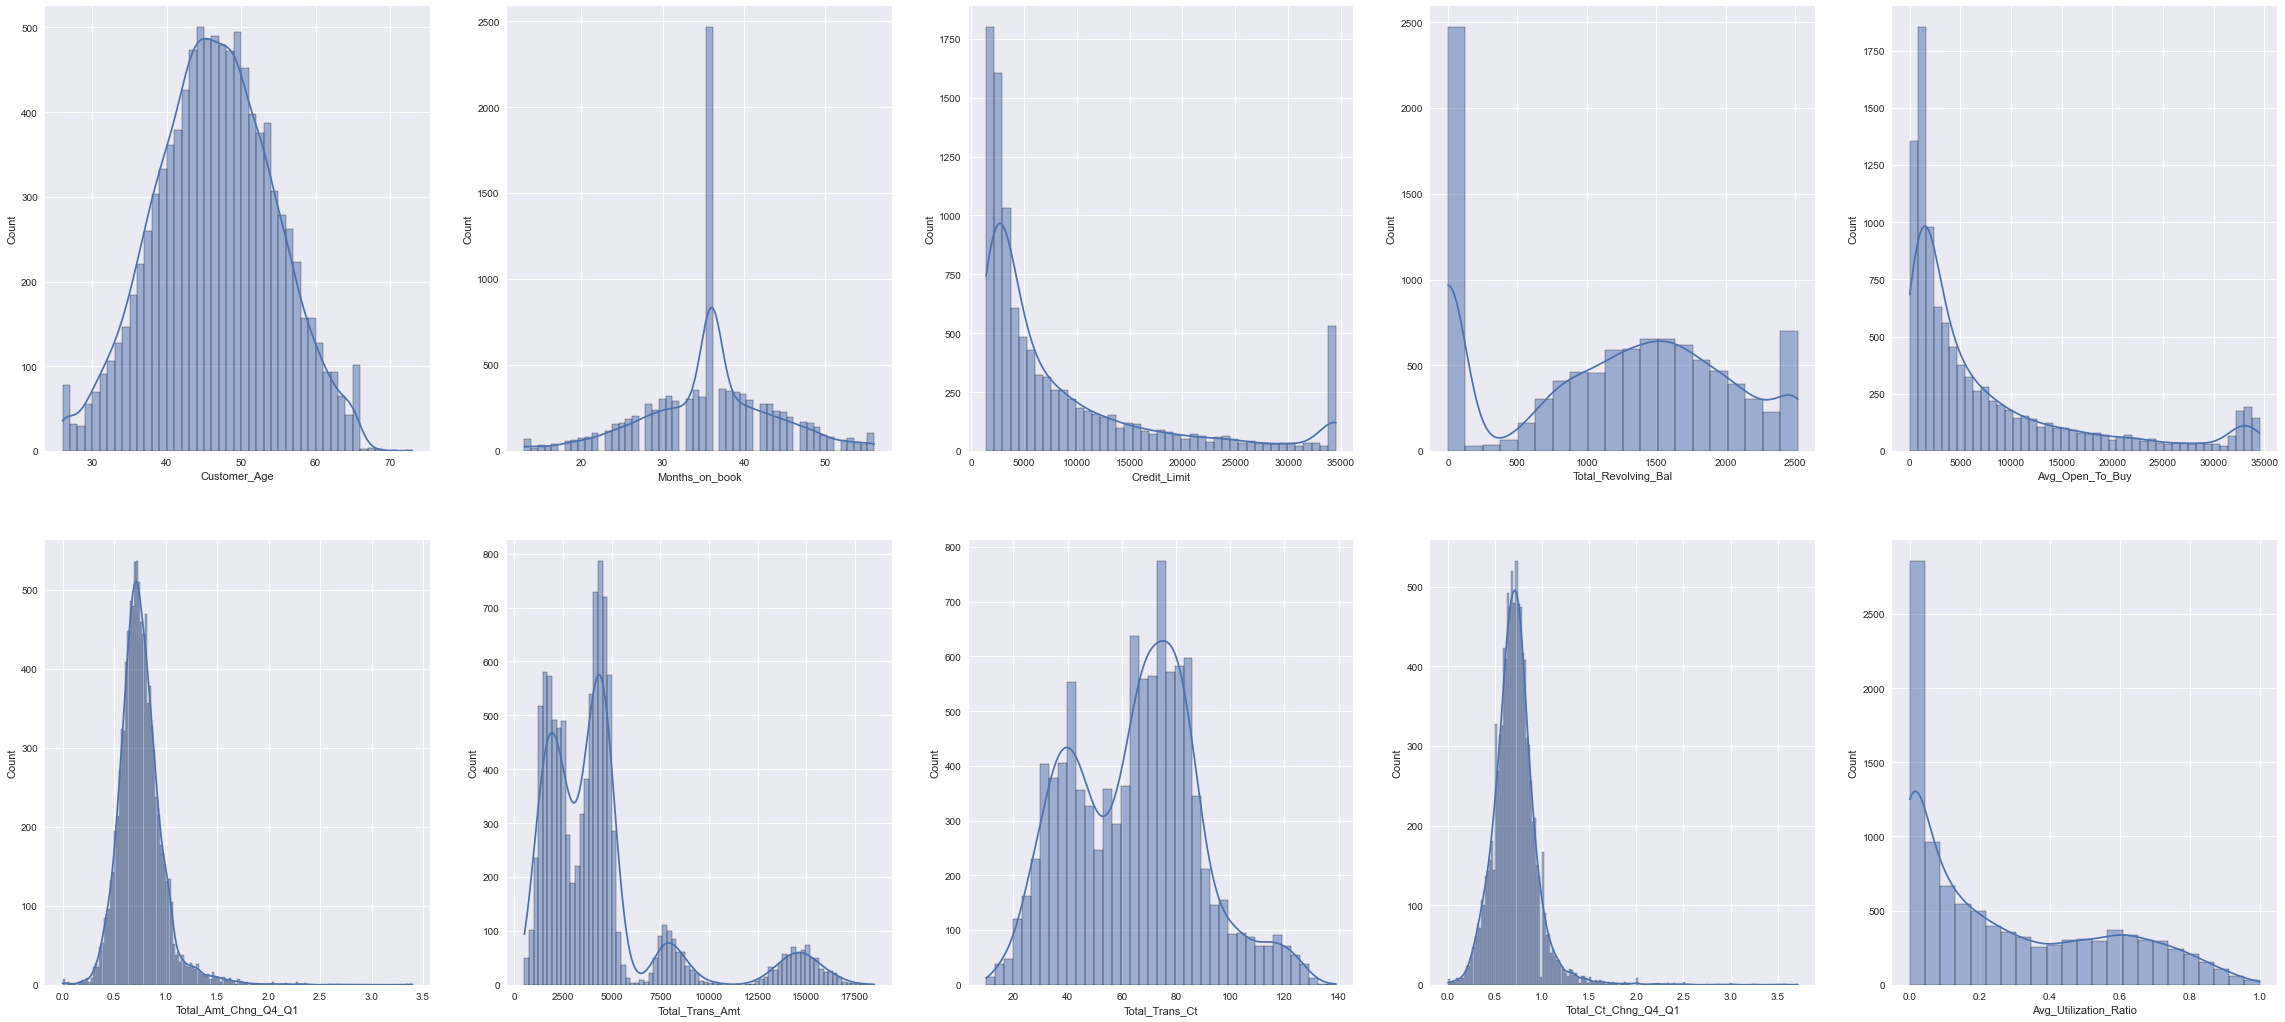

In [147]:
# histplot
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(40, 18))

try:
    count = 0
    for i in range(2):
        for j in range(5):
            sns.histplot(x=df_conti[df_conti.columns[count]], fill=True, kde=True, ax=ax[i][j])
            count += 1
except IndexError:
    pass

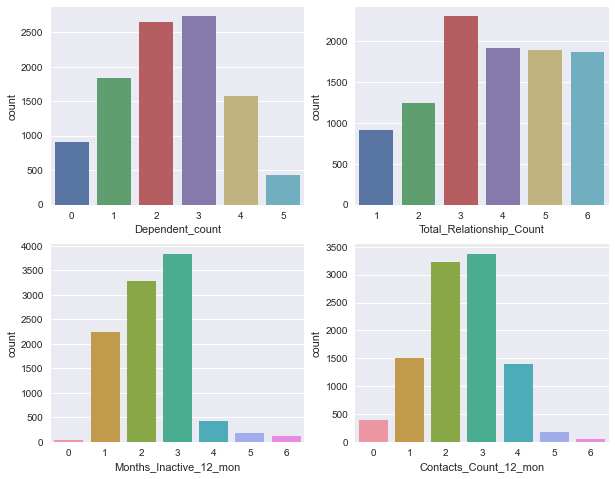

In [130]:
# Countplot
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))

try:
    count = 0
    for i in range(2):
        for j in range(2):
            sns.countplot(x=df_discrete[df_discrete.columns[count]], ax=ax[i][j])
            count += 1
except IndexError:
    pass

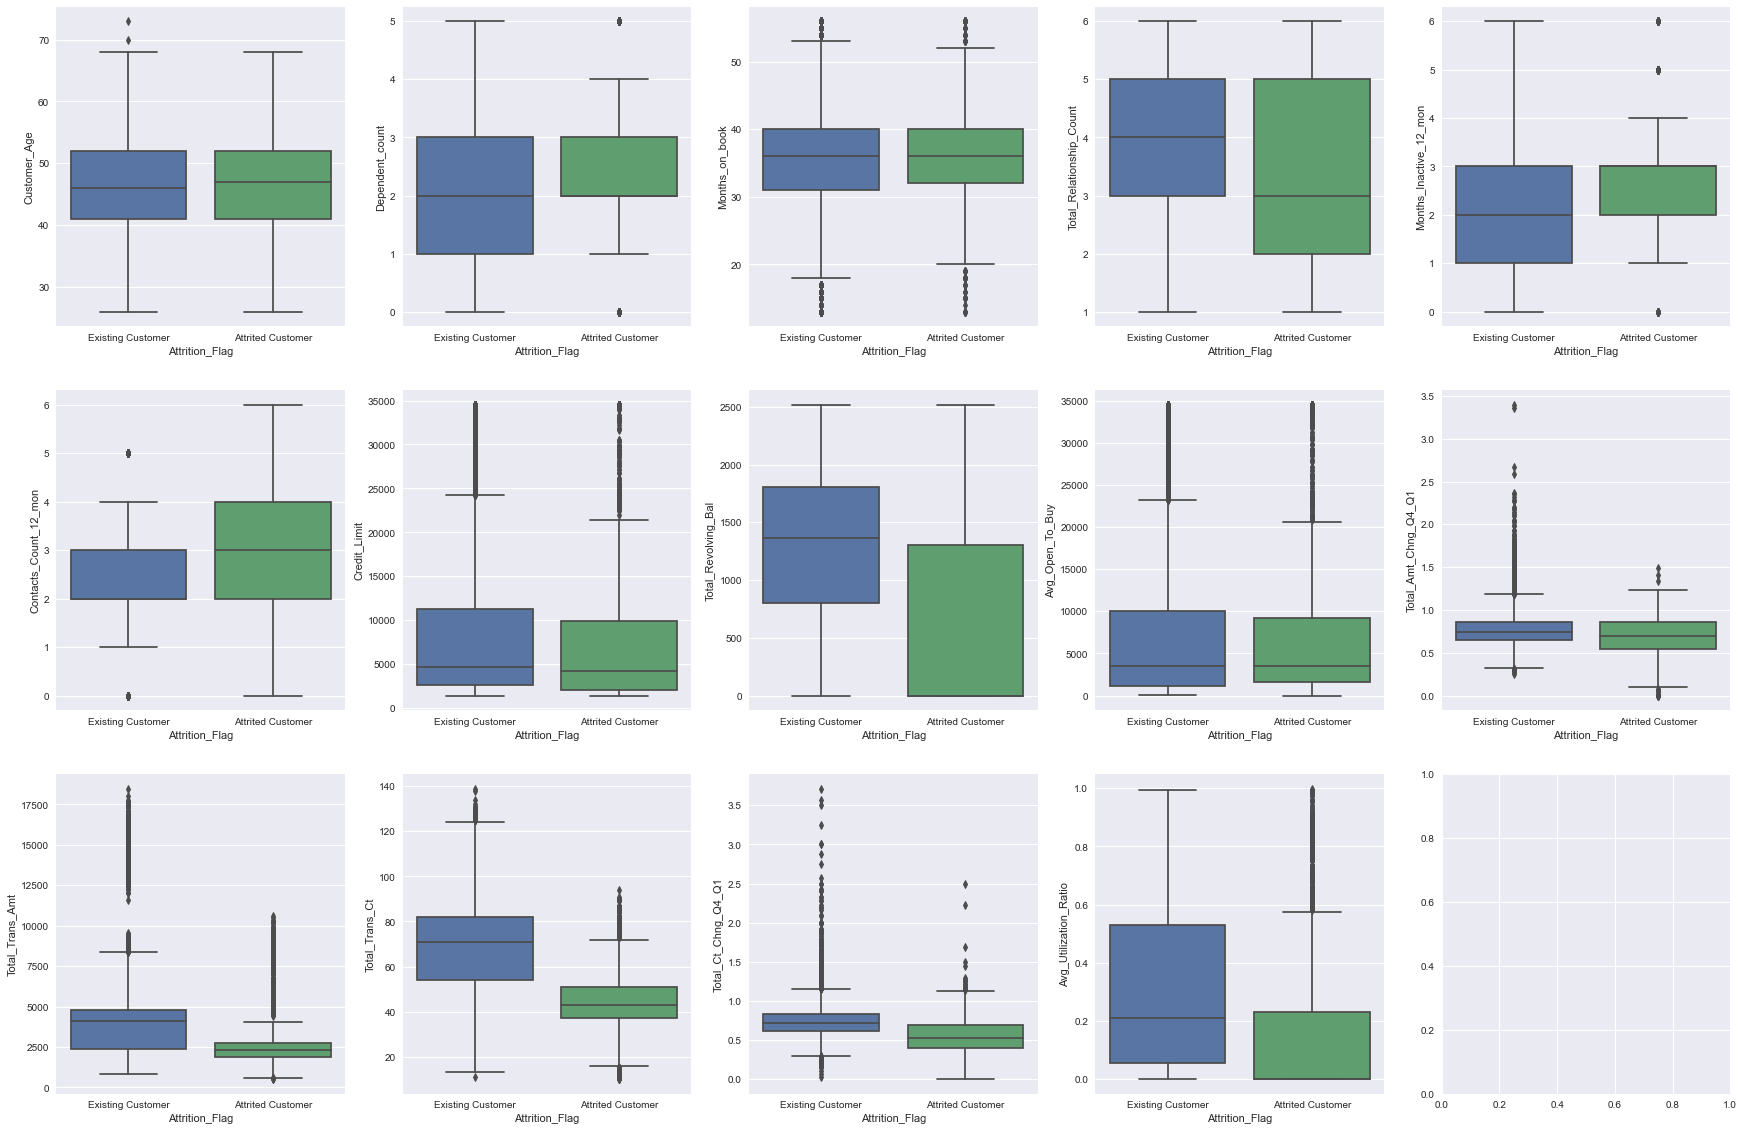

In [148]:
# Boxplot
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(30, 20))

try:
    count = 0
    for i in range(3):
        for j in range(5):
            sns.boxplot(x=df['Attrition_Flag'], y=df_num[df_num.columns[count]], ax=ax[i][j])
            count += 1
except IndexError:
    pass

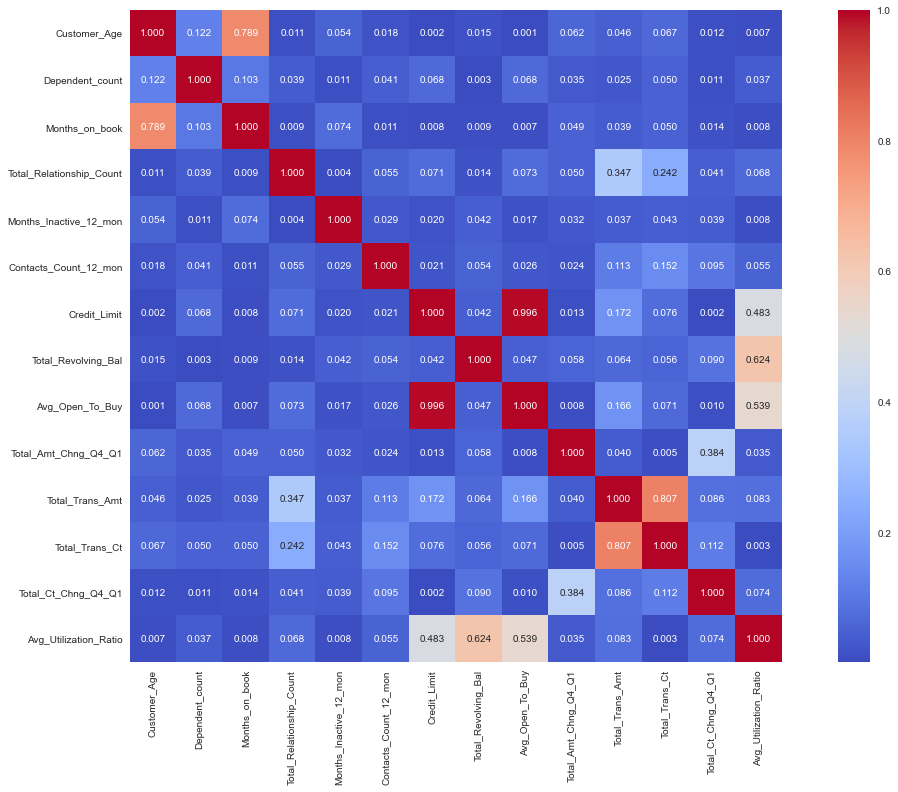

In [151]:
corr_data = df.loc[:, list(df_num.columns)].corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)

## Feature Engineering

In [169]:
df_updated = pd.DataFrame()

In [221]:
df_cats = df.select_dtypes(include=['object'])
cats_cols = list(df_cats.columns)

In [222]:
labelencoder = LabelEncoder()
df_updated['Attrition'] = labelencoder.fit_transform(df['Attrition_Flag'])

cats_cols.remove('Attrition_Flag')
concat_list = [df_updated, pd.get_dummies(df[cats_cols]), df[list(df_num.columns)]]

df_updated = pd.concat(concat_list, axis=1)

In [224]:
print('Updated shape: {}'.format(df_updated.shape))
df_updated

Updated shape: (10127, 38)


,Attrition,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,0,1,0,0,0,1,0,0,0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,1,0,0,0,1,0,0,0,0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,0,1,0,0,1,0,0,0,0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,1,0,0,0,0,1,0,0,0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,0,1,0,0,0,0,0,1,0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,0,1,0,0,1,0,0,0,0,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,0,1,0,0,0,0,0,0,1,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,1,0,0,0,0,1,0,0,0,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,0,1,0,0,1,0,0,0,0,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### Feature selecting

In [253]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df_updated.drop('Attrition', axis=1)
y = df_updated['Attrition']

In [261]:
# SelectKBest
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([df_columns,df_scores],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score')  #print 10 best features

,Specs,Score
33,Total_Trans_Amt,754246.053313
30,Total_Revolving_Bal,400235.401723
29,Credit_Limit,55227.259276
34,Total_Trans_Ct,11865.365976
28,Contacts_Count_12_mon,211.039445
26,Total_Relationship_Count,144.398171
27,Months_Inactive_12_mon,102.667123
36,Avg_Utilization_Ratio,89.116891
35,Total_Ct_Chng_Q4_Q1,67.802873
32,Total_Amt_Chng_Q4_Q1,10.998295


[0.00681353 0.00808189 0.00761391 0.00581217 0.01144584 0.01022544
 0.00632324 0.00933643 0.00978492 0.00599048 0.013561   0.01179927
 0.00644415 0.00493003 0.00832687 0.00579694 0.00630475 0.00873844
 0.00551669 0.00379916 0.00188047 0.00071039 0.00355458 0.03069553
 0.02500812 0.02904575 0.06390498 0.03862181 0.04431985 0.03170586
 0.10173502 0.03085047 0.04599728 0.11302856 0.15942382 0.07239091
 0.05048145]


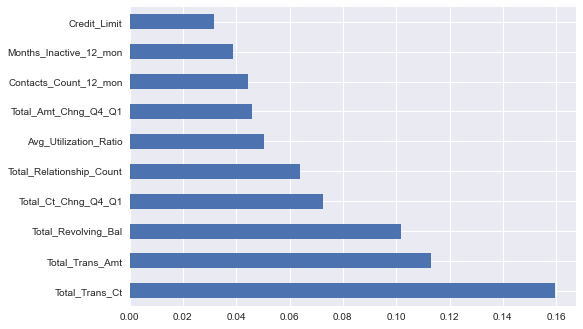

In [262]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Modeling

In [225]:
# Importing packages for modelling.

import xgboost as xgb
import lightgbm as lgb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [229]:
def estimates(X_data, y_data, models, cv):
    
    train_acc_dict = dict()
    test_acc_dict = dict()
    time_dict = dict()
    
    for model in models:
        
        current_model_name = model.__class__.__name__
        
        cv_results = cross_validate(model, X_data, y_data, cv=cv,
                                    return_train_score=True, scoring='accuracy')
        
        train_acc_dict[current_model_name] = cv_results['train_score'].mean()
        test_acc_dict[current_model_name] = cv_results['test_score'].mean()
        time_dict[current_model_name] = cv_results['fit_time'].mean()
        
    return train_acc_dict, test_acc_dict, time_dict

In [226]:
# Models
m_logreg = LogisticRegression()

m_gbc = GradientBoostingClassifier(random_state=14)

m_rfc = RandomForestClassifier(criterion='gini', n_estimators=999,
                            max_depth=4, random_state=14)

m_lgb = lgb.LGBMClassifier(num_iterations=550, learning_rate=0.01055,
                        max_depth=3, random_state=14)

m_xgb = xgb.XGBClassifier(n_estimators=2250,
                       max_depth=2, random_state=14)

m_gnb = GaussianNB()

m_mlpc = MLPClassifier(random_state=14)

m_svc = SVC(probability=True)

In [245]:
cv = StratifiedKFold(11, shuffle=True, random_state=14)

models = [m_logreg, m_gbc, m_rfc, m_lgb, m_xgb, m_gnb, m_mlpc, m_svc]

X = df_updated.drop('Attrition', axis=1)
y = df_updated['Attrition']

print(X.shape)
print(y.shape)

(10127, 37)
(10127,)


In [230]:
train_acc_dict, test_acc_dict, time_dict = estimates(X, y, models, cv)

(10127, 37)
(10127,)


C:\Users\王豫平\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\王豫平\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [231]:
for key, value in train_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 88.1%
GradientBoostingClassifier - 97.5%
RandomForestClassifier - 90.6%
LGBMClassifier - 96.4%
XGBClassifier - 100.0%
GaussianNB - 89.8%
MLPClassifier - 79.8%
SVC - 83.9%


### Normalization

In [235]:
from sklearn import preprocessing

In [243]:
X_scale = preprocessing.scale(X)

In [237]:
train_acc_dict, test_acc_dict, time_dict = estimates(X_scale, y, models, cv)

C:\Users\王豫平\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\王豫平\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\王豫平\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\王豫平\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use

In [239]:
# Train accuracy
for key, value in train_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 90.5%
GradientBoostingClassifier - 97.5%
RandomForestClassifier - 90.6%
LGBMClassifier - 96.4%
XGBClassifier - 100.0%
GaussianNB - 88.2%
MLPClassifier - 98.5%
SVC - 93.9%


In [240]:
# Test accuracy
for key, value in test_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 90.3%
GradientBoostingClassifier - 96.6%
RandomForestClassifier - 90.4%
LGBMClassifier - 95.7%
XGBClassifier - 97.0%
GaussianNB - 87.8%
MLPClassifier - 92.5%
SVC - 91.7%


### Dimensional reduction

In [264]:
# Build data pipeline
my_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=4)),
])

X_red = my_pipe.fit_transform(X)

In [265]:
# Fit the models
train_acc_dict_red, test_acc_dict_red, time_dict_red = estimates(X_red, y, models, cv)

C:\Users\王豫平\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\王豫平\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\王豫平\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\王豫平\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use

In [267]:
# Train accuracy
for key, value in train_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 90.5%
GradientBoostingClassifier - 97.5%
RandomForestClassifier - 90.6%
LGBMClassifier - 96.4%
XGBClassifier - 100.0%
GaussianNB - 88.2%
MLPClassifier - 98.5%
SVC - 93.9%


In [268]:
# Test accuracy
for key, value in test_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 90.3%
GradientBoostingClassifier - 96.6%
RandomForestClassifier - 90.4%
LGBMClassifier - 95.7%
XGBClassifier - 97.0%
GaussianNB - 87.8%
MLPClassifier - 92.5%
SVC - 91.7%
